In [1]:
%matplotlib inline

## OpenML Datasets: Banknote example


How to list and download datasets.

In [2]:
import openml
import pandas as pd
from rerf.rerfClassifier import rerfClassifier

# Import scikit-learn dataset library
from sklearn import datasets

# Import train_test_split function
from sklearn.model_selection import train_test_split

RS = 21208

### Download datasets

---


In [3]:
# This is done based on the dataset ID ('did').
dataset = openml.datasets.get_dataset(1462)

# Print a summary
print("This is dataset '%s', the target feature is '%s'" %
      (dataset.name, dataset.default_target_attribute))
print("URL: %s" % dataset.url)
print(dataset.description[:500])

This is dataset 'banknote-authentication', the target feature is 'Class'
URL: https://www.openml.org/data/v1/download/1586223/banknote-authentication.arff
Author: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe)  
Source: [UCI](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) - 2012  
Please cite: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html) 

Dataset about distinguishing genuine and forged banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 


Get the actual data.

Returned as numpy array, with meta-info (e.g. target feature, feature names,...)



In [4]:
X, y, attribute_names,_ = dataset.get_data(
    target=dataset.default_target_attribute
)

dat = pd.DataFrame(X)
Y = [int(yi) - 1 for yi in y]
dat['Y'] = Y

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state = RS
)  # 75% training and 25% test

**********
* Explore the data visually.



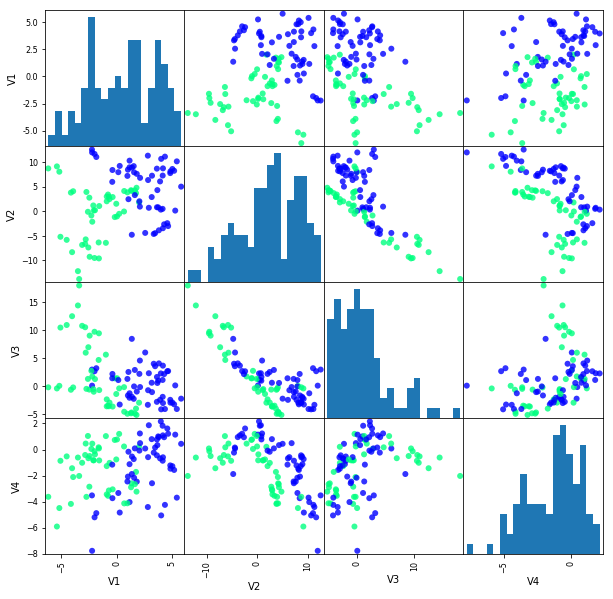

In [5]:
dat = dat.sample(n=1000, random_state = RS)
_ = pd.plotting.scatter_matrix(
    dat.iloc[:100, :4],
    c=dat[:100]['Y'],
    figsize=(10, 10),
    marker='o',
    hist_kwds={'bins': 20},
    alpha=.8,
    cmap='winter'
)

In [6]:
# Create a RerF Classifier
clf = rerfClassifier(n_estimators=50, max_features=8, n_jobs = 2, random_state = RS)

In [7]:
clf.fit(X_train, y_train)

rerfClassifier(feature_combinations=1.5, image_height=None, image_width=None,
               max_depth=None, max_features=8, min_samples_split=1,
               n_estimators=50, n_jobs=2, oob_score=False,
               patch_height_max=None, patch_height_min=1, patch_width_max=None,
               patch_width_min=1, projection_matrix='RerF', random_state=21208)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
